# 1. Understanding the problem and data

Binary Classification is a well known problem which can be solved with machine learning algorithms  
I will use some popular classification algorithms and based on prediction metrics, will choose the best among them  
Reference : https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

I will be importing the python libraries 
1) pandas to handle data in dataframes  
2) sklearn to preprocess data, for model building, and evaluation  
3) matplotlib for data visualization

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Splitting to test and train sets, and using cross validation to avoid data leakage   
Reference : https://machinelearningmastery.com/data-leakage-machine-learning/

In [2]:
# split the data, 80% to train set and 20% to test set
data = pd.read_csv("mushrooms.csv")
train, test = train_test_split(data, test_size=0.20, random_state=42)

#save the data
train.to_csv('train.csv',index=False)
test.to_csv('test.csv',index=False)

In [3]:
# exploring the data
train.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
7873,p,k,s,e,f,s,f,c,n,b,...,k,p,w,p,w,o,e,w,v,d
6515,p,x,s,n,f,f,f,c,n,b,...,s,w,w,p,w,o,e,w,v,p
6141,p,f,y,e,f,y,f,c,n,b,...,s,p,w,p,w,o,e,w,v,l
2764,e,f,f,n,t,n,f,c,b,u,...,s,g,p,p,w,o,p,n,v,d
438,e,b,y,y,t,l,f,c,b,k,...,s,w,w,p,w,o,p,n,n,m


In [4]:
train.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,6499,6499,6499,6499,6499,6499,6499,6499,6499,6499,...,6499,6499,6499,6499,6499,6499,6499,6499,6499,6499
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,3365,2956,2602,1823,3802,2833,6331,5451,4496,1398,...,3944,3573,3502,6499,6340,5976,3154,1936,3218,2513


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6499 entries, 7873 to 7270
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     6499 non-null   object
 1   cap-shape                 6499 non-null   object
 2   cap-surface               6499 non-null   object
 3   cap-color                 6499 non-null   object
 4   bruises                   6499 non-null   object
 5   odor                      6499 non-null   object
 6   gill-attachment           6499 non-null   object
 7   gill-spacing              6499 non-null   object
 8   gill-size                 6499 non-null   object
 9   gill-color                6499 non-null   object
 10  stalk-shape               6499 non-null   object
 11  stalk-root                6499 non-null   object
 12  stalk-surface-above-ring  6499 non-null   object
 13  stalk-surface-below-ring  6499 non-null   object
 14  stalk-color-above-rin

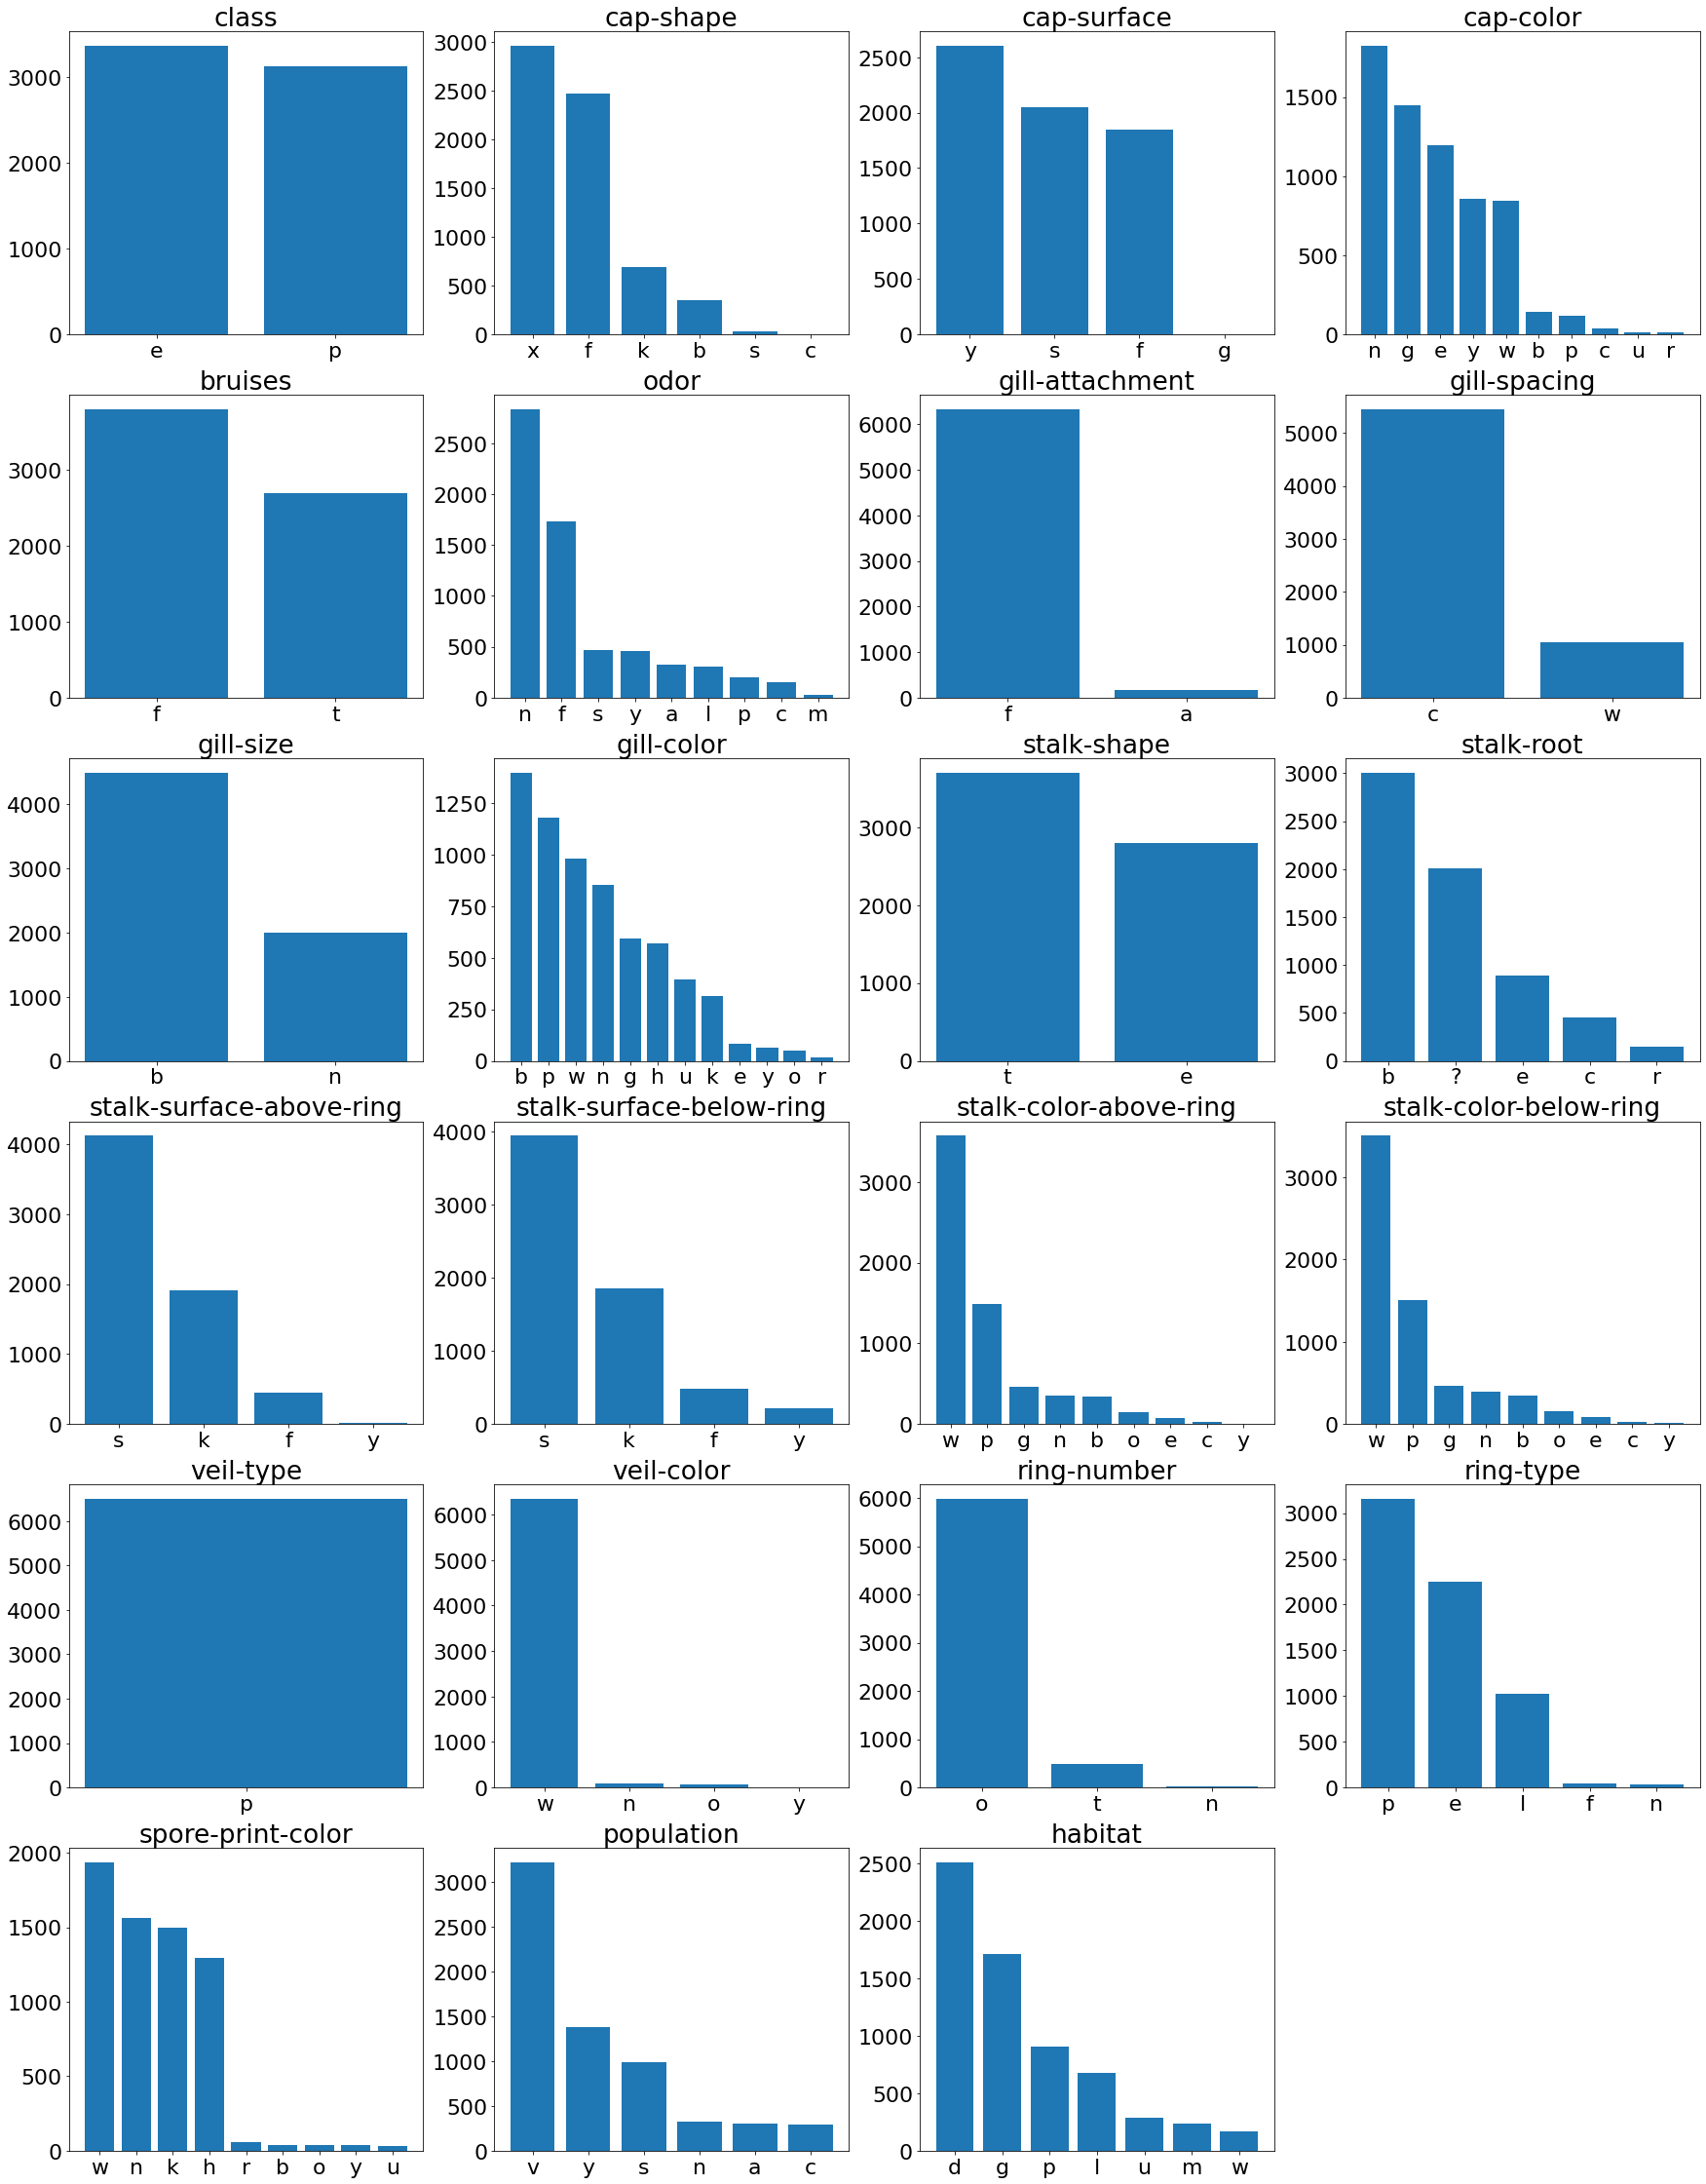

In [8]:
# Creating frequency plots for each column

# plot settings : figsize and font size
plt.figure(figsize=(30,40))
plt.rcParams.update({'font.size': 22})

# looping over each trip type and finding top 5 depts assosciated
for count, column in enumerate(train.columns):
    x = train[column].value_counts(sort=True)
    plt.subplot(6, 4, count+1)
    plt.bar(x.index, x.values)
    plt.title(f"{column}")

The count of binary labels (p, e) are almost the same, so this dataset is close to a balanced classification  
We have too many null values in the feature **stalk-root** with '?' values  
These should be replaced with 'NA' during data preprocessing.

All things considered, this dataset is mostly clean